# Regression - FFNN (test)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Build Model

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

In [10]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 323us/sample - loss: 88.3470 - mae: 8.7779 - val_loss: 55.8603 - val_mae: 6.6456
Epoch 2/100
3341/3341 [==============================] - 0s 45us/sample - loss: 23.8801 - mae: 3.8564 - val_loss: 13.5769 - val_mae: 3.0226
Epoch 3/100
3341/3341 [==============================] - 0s 37us/sample - loss: 10.6668 - mae: 2.5132 - val_loss: 10.3701 - val_mae: 2.3802
Epoch 4/100
3341/3341 [==============================] - 0s 33us/sample - loss: 9.1224 - mae: 2.2627 - val_loss: 9.7602 - val_mae: 2.2356
Epoch 5/100
3341/3341 [==============================] - 0s 29us/sample - loss: 8.7254 - mae: 2.1546 - val_loss: 9.0934 - val_mae: 2.1861
Epoch 6/100
3341/3341 [==============================] - 0s 34us/sample - loss: 8.2086 - mae: 2.0850 - val_loss: 8.6103 - val_mae: 2.0902
Epoch 7/100
3341/3341 [==============================] - 0s 33us/sample - loss: 7.6357 - mae: 2.0111 - val_loss: 8.019

In [12]:
y_pred = model.predict(X_test)

## Evaluate

In [13]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [14]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.628186913852855
RMSE :      2.1513221315862614
r2_score :  0.5875665219162838


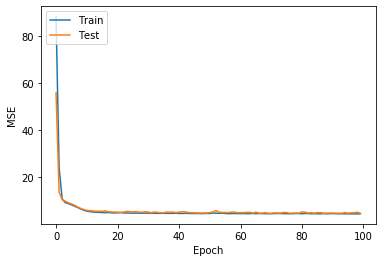

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 1-1 : increase param

In [17]:
model = Sequential()
model.add(Dense(512, input_shape=(8,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 404us/sample - loss: 29.2887 - mae: 4.1126 - val_loss: 12.1843 - val_mae: 2.7881
Epoch 2/100
3341/3341 [==============================] - 1s 184us/sample - loss: 9.7994 - mae: 2.2942 - val_loss: 9.5234 - val_mae: 2.2367
Epoch 3/100
3341/3341 [==============================] - 1s 163us/sample - loss: 8.2263 - mae: 2.0981 - val_loss: 8.1718 - val_mae: 2.0550
Epoch 4/100
3341/3341 [==============================] - 0s 121us/sample - loss: 7.0855 - mae: 1.9246 - val_loss: 7.6078 - val_mae: 1.8193
Epoch 5/100
3341/3341 [==============================] - 0s 105us/sample - loss: 6.0878 - mae: 1.7775 - val_loss: 6.8555 - val_mae: 2.1118
Epoch 6/100
3341/3341 [==============================] - 0s 102us/sample - loss: 5.8897 - mae: 1.7875 - val_loss: 6.1725 - val_mae: 1.6580
Epoch 7/100
3341/3341 [==============================] - 0s 100us/sample - loss: 5.3222 - mae: 1.6683 - val_loss: 6.1

Epoch 59/100
3341/3341 [==============================] - 1s 177us/sample - loss: 4.8192 - mae: 1.5764 - val_loss: 4.9478 - val_mae: 1.5342
Epoch 60/100
3341/3341 [==============================] - 1s 152us/sample - loss: 4.4092 - mae: 1.4817 - val_loss: 5.3270 - val_mae: 1.5650
Epoch 61/100
3341/3341 [==============================] - 0s 91us/sample - loss: 4.5294 - mae: 1.5100 - val_loss: 4.7444 - val_mae: 1.6283
Epoch 62/100
3341/3341 [==============================] - 0s 102us/sample - loss: 4.5576 - mae: 1.5244 - val_loss: 6.0155 - val_mae: 1.6631
Epoch 63/100
3341/3341 [==============================] - 0s 112us/sample - loss: 4.5439 - mae: 1.5033 - val_loss: 4.8258 - val_mae: 1.5313
Epoch 64/100
3341/3341 [==============================] - 0s 98us/sample - loss: 4.4105 - mae: 1.4940 - val_loss: 5.5443 - val_mae: 1.6019
Epoch 65/100
3341/3341 [==============================] - 0s 112us/sample - loss: 4.5927 - mae: 1.5243 - val_loss: 4.9938 - val_mae: 1.5416
Epoch 66/100
3341/3341

In [20]:
y_pred = model.predict(X_test)

## Evaluate

In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [22]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.804425480102542
RMSE :      2.191899970368753
r2_score :  0.5718613038246627


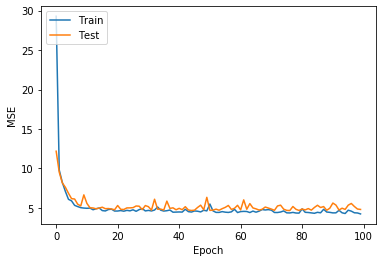

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 1-2 : change optimizer

In [25]:
model = Sequential()
model.add(Dense(512, input_shape=(8,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [26]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


In [28]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 289us/sample - loss: 35.6837 - mae: 4.7782 - val_loss: 9.8762 - val_mae: 2.1046
Epoch 2/100
3341/3341 [==============================] - 1s 223us/sample - loss: 10.0331 - mae: 2.3646 - val_loss: 8.1920 - val_mae: 1.9170
Epoch 3/100
3341/3341 [==============================] - 0s 136us/sample - loss: 8.2746 - mae: 2.1488 - val_loss: 7.3560 - val_mae: 1.9682
Epoch 4/100
3341/3341 [==============================] - 0s 105us/sample - loss: 8.8304 - mae: 2.1988 - val_loss: 11.5142 - val_mae: 2.8994
Epoch 5/100
3341/3341 [==============================] - 0s 103us/sample - loss: 7.3436 - mae: 1.9747 - val_loss: 7.2052 - val_mae: 2.0922
Epoch 6/100
3341/3341 [==============================] - 0s 105us/sample - loss: 7.3627 - mae: 1.9910 - val_loss: 9.0368 - val_mae: 1.9206
Epoch 7/100
3341/3341 [==============================] - 0s 103us/sample - loss: 7.3869 - mae: 1.9980 - val_loss: 12

In [29]:
y_pred = model.predict(X_test)

## Evaluate

In [30]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [31]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.975040370808466
RMSE :      2.444389570180757
r2_score :  0.4675438292159042


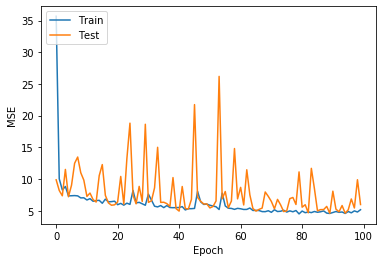

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 1-3 : increase param

In [43]:
model = Sequential()
model.add(Dense(512, input_shape=(8,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

In [46]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 558us/sample - loss: 28.1367 - mae: 4.0296 - val_loss: 9.8951 - val_mae: 2.4549
Epoch 2/100
3341/3341 [==============================] - 1s 262us/sample - loss: 8.5814 - mae: 2.1771 - val_loss: 9.6799 - val_mae: 2.0997
Epoch 3/100
3341/3341 [==============================] - 1s 218us/sample - loss: 7.2214 - mae: 1.9260 - val_loss: 6.7063 - val_mae: 1.9523
Epoch 4/100
3341/3341 [==============================] - 1s 196us/sample - loss: 6.3137 - mae: 1.8192 - val_loss: 6.0279 - val_mae: 1.7015
Epoch 5/100
3341/3341 [==============================] - 1s 277us/sample - loss: 5.7671 - mae: 1.7601 - val_loss: 6.3557 - val_mae: 1.6491
Epoch 6/100
3341/3341 [==============================] - 1s 279us/sample - loss: 5.3719 - mae: 1.6750 - val_loss: 6.5175 - val_mae: 1.6865
Epoch 7/100
3341/3341 [==============================] - 1s 283us/sample - loss: 5.1954 - mae: 1.6476 - val_loss: 5.12

In [47]:
y_pred = model.predict(X_test)

## Evaluate

In [48]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [49]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       6.705038039198805
RMSE :      2.589408820406466
r2_score :  0.4024912539912374


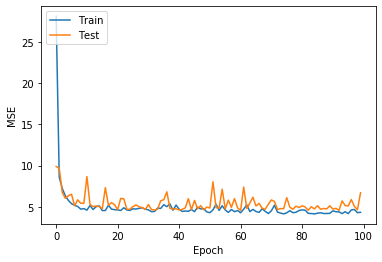

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ------------------------------
## Model 2 Dummy Columns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [61]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [63]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 246us/sample - loss: 89.4263 - mae: 8.8894 - val_loss: 54.7446 - val_mae: 6.7646
Epoch 2/100
3341/3341 [==============================] - 0s 32us/sample - loss: 19.2289 - mae: 3.4369 - val_loss: 8.8779 - val_mae: 2.3851
Epoch 3/100
3341/3341 [==============================] - 0s 40us/sample - loss: 7.6592 - mae: 1.9693 - val_loss: 7.5649 - val_mae: 1.9622
Epoch 4/100
3341/3341 [==============================] - 0s 37us/sample - loss: 6.8992 - mae: 1.9144 - val_loss: 7.3050 - val_mae: 1.8709
Epoch 5/100
3341/3341 [==============================] - 0s 48us/sample - loss: 6.5411 - mae: 1.8467 - val_loss: 6.9745 - val_mae: 1.8399
Epoch 6/100
3341/3341 [==============================] - 0s 42us/sample - loss: 6.2930 - mae: 1.8180 - val_loss: 6.8015 - val_mae: 1.7967
Epoch 7/100
3341/3341 [==============================] - 0s 53us/sample - loss: 6.1437 - mae: 1.7835 - val_loss: 6.7222 -

In [64]:
y_pred = model.predict(X_test)

## Evaluate

In [65]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.81047612001228
RMSE :      2.193279763279705
r2_score :  0.5713221107218223


## Model 2-3 : increase param

In [74]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [76]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_48 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 1)                

In [77]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 683us/sample - loss: 27.2003 - mae: 3.9194 - val_loss: 8.3886 - val_mae: 1.9013
Epoch 2/100
3341/3341 [==============================] - 1s 212us/sample - loss: 7.8861 - mae: 2.0448 - val_loss: 7.3697 - val_mae: 2.1408
Epoch 3/100
3341/3341 [==============================] - 1s 199us/sample - loss: 6.3470 - mae: 1.8153 - val_loss: 6.3434 - val_mae: 1.8925
Epoch 4/100
3341/3341 [==============================] - 1s 225us/sample - loss: 5.5987 - mae: 1.7179 - val_loss: 6.0801 - val_mae: 1.6434
Epoch 5/100
3341/3341 [==============================] - 1s 206us/sample - loss: 5.1409 - mae: 1.6176 - val_loss: 6.3203 - val_mae: 1.6760
Epoch 6/100
3341/3341 [==============================] - 1s 202us/sample - loss: 4.9048 - mae: 1.5828 - val_loss: 5.3704 - val_mae: 1.5759
Epoch 7/100
3341/3341 [==============================] - 1s 228us/sample - loss: 4.7953 - mae: 1.5616 - val_loss: 5.17

In [78]:
y_pred = model.predict(X_test)

## Evaluate

In [79]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [80]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       6.170228162478003
RMSE :      2.4839943966277387
r2_score :  0.4501499811937353


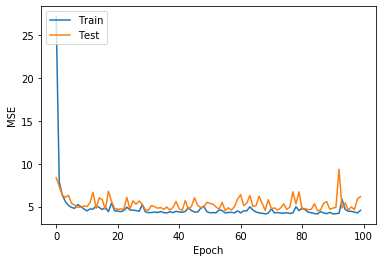

In [81]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 3

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5632      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [13]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
 128/3341 [>.............................] - ETA: 2:19

InternalError:  Blas GEMM launch failed : a.shape=(128, 10), b.shape=(10, 512), m=128, n=512, k=10
	 [[node sequential/dense/MatMul (defined at c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_1239]

Function call stack:
distributed_function


In [78]:
y_pred = model.predict(X_test)

## Evaluate

In [79]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [80]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       6.170228162478003
RMSE :      2.4839943966277387
r2_score :  0.4501499811937353


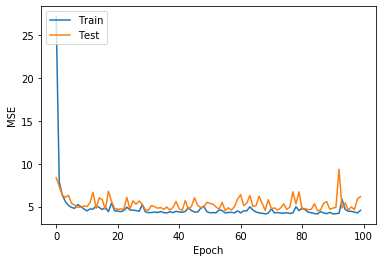

In [81]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()